In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy 
import pickle

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table, Column, vstack, join

import palettable

cmap_1 = palettable.colorbrewer.sequential.Blues_7_r
cmap_2 = palettable.colorbrewer.sequential.OrRd_7_r
cmap_3 = palettable.colorbrewer.sequential.YlGn_7_r
cmap_4 = palettable.colorbrewer.sequential.Purples_7_r

cmap_list = [cmap_1, cmap_2, cmap_3, cmap_4]

color_bins = ["#377eb8", "#e41a1c", "#1b9e77", "#984ea3"]

In [3]:
import jianbing

from jianbing import hsc
from jianbing import utils
from jianbing import visual
from jianbing import catalog

In [4]:
data_dir = jianbing.DATA_DIR

fig_dir = jianbing.FIG_DIR

sim_dir = jianbing.SIM_DIR
bin_dir = jianbing.BIN_DIR
res_dir = jianbing.RES_DIR

### Compare the outer envelope stellar mass and other halo mass proxies

#### DSigma profiles of HSC massive galaxies

In [5]:
# DeltaSigma profiles of HSC massive galaxies
topn_massive = pickle.load(open(os.path.join(res_dir, 'topn_galaxies_sum.pkl'), 'rb'))

#### DSigma profiles of mock galaxies

In [6]:
sim_dsig = Table.read(os.path.join(sim_dir, 'sim_merge_all_dsig.fits'))

#### Halo mass distributions

In [7]:
sim_mhalo = Table.read(os.path.join(sim_dir, 'sim_merge_mhalo_hist.fits'))

In [40]:
m100_dsig = topn_massive['logm_100']
mmax_dsig = topn_massive['logm_max']

m50_100_dsig = topn_massive['logm_50_100']
m50_150_dsig = topn_massive['logm_50_150']

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 1.096+/-0.204
Mean Mvir: 14.326 v.s. 14.385
Difference of Mvir in Bin 1: -0.058


/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 2: 1.222+/-0.170
Mean Mvir: 13.863 v.s. 14.035
Difference of Mvir in Bin 2: -0.173
Mean ratio in Bin 3: 1.276+/-0.127
Mean Mvir: 13.585 v.s. 13.808
Difference of Mvir in Bin 3: -0.223
Mean ratio in Bin 4: 1.217+/-0.115
Mean Mvir: 13.325 v.s. 13.553
Difference of Mvir in Bin 4: -0.228


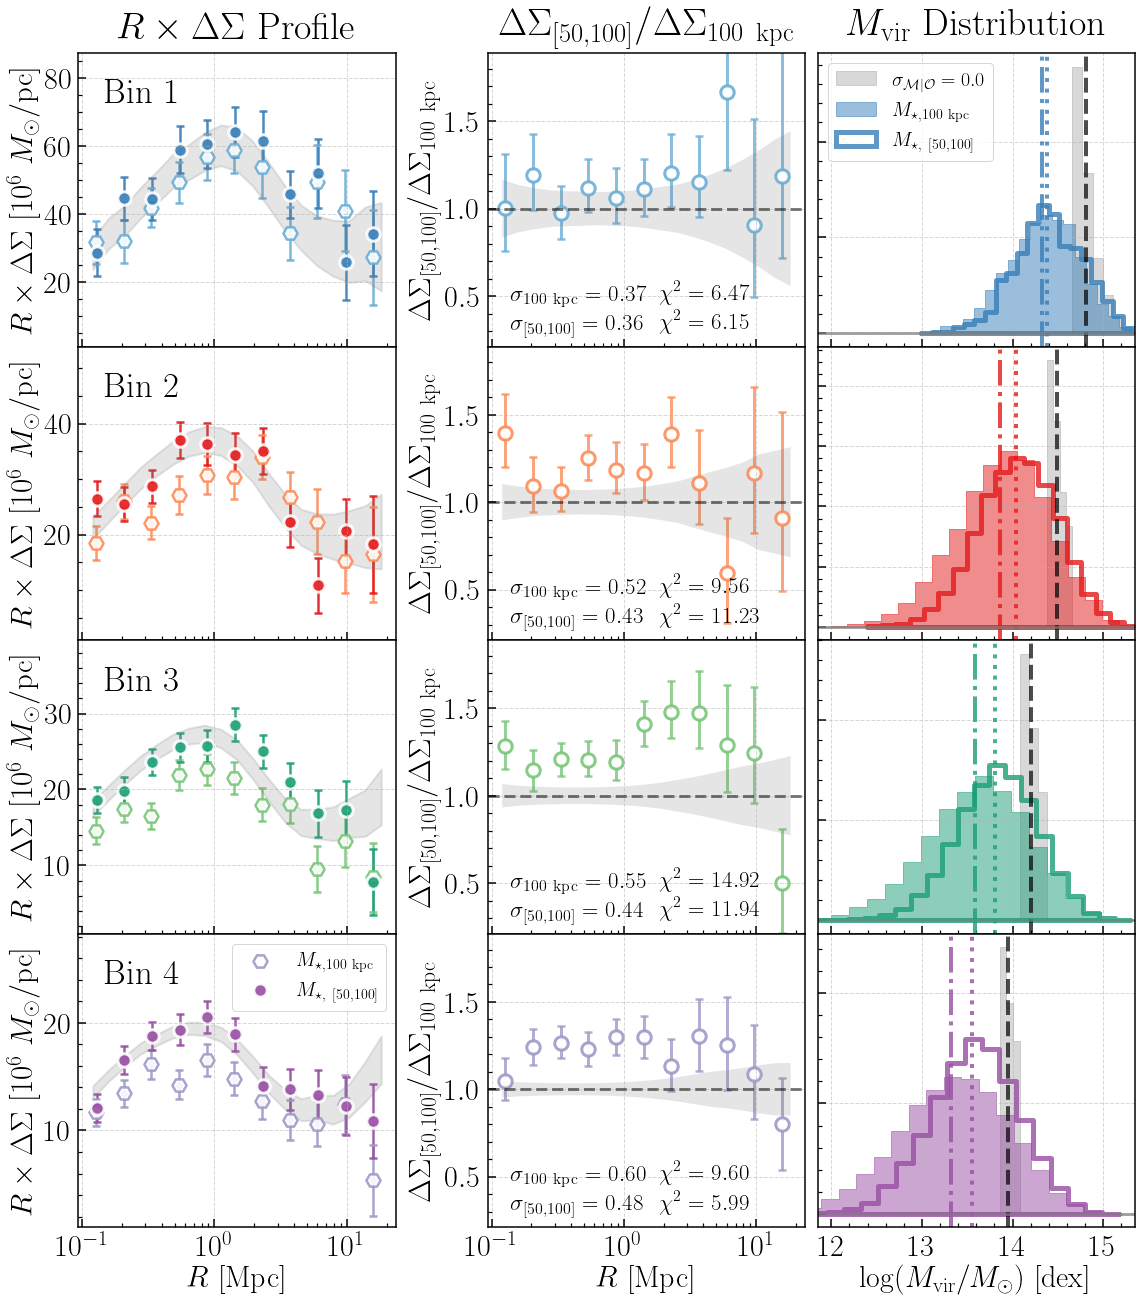

In [42]:
dsig_ref = m100_dsig
label_ref = r'$M_{\star,100\ \rm kpc}$'
sub_ref = r'{100\ \rm kpc}'

dsig_cmp = m50_100_dsig
label_cmp = r'$M_{\star,\ [50, 100]}$'
sub_cmp = r'{[50, 100]}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='bt', compare_to_model=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp,
    marker_ref='H', marker_cmp='o', msize_ref=200, msize_cmp=180,
    ratio_range=(0.21, 1.89), show_stats=True)

In [43]:
fig.savefig(os.path.join(fig_dir, 'fig_6.png'), dpi=120)
fig.savefig(os.path.join(fig_dir, 'fig_6.pdf'), dpi=120)

#### Maximum 1-D stellar mass v.s. [50, 100] kpc mass

In [44]:
m100_dsig = topn_massive['logm_100']
mmax_dsig = topn_massive['logm_max']

m50_100_dsig = topn_massive['logm_50_100']
m50_150_dsig = topn_massive['logm_50_150']

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 1.070+/-0.195
Mean Mvir: 14.385 v.s. 14.385
Difference of Mvir in Bin 1: 0.000


/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 2: 1.103+/-0.147
Mean Mvir: 13.932 v.s. 14.035
Difference of Mvir in Bin 2: -0.103
Mean ratio in Bin 3: 1.276+/-0.123
Mean Mvir: 13.585 v.s. 13.808
Difference of Mvir in Bin 3: -0.223
Mean ratio in Bin 4: 1.101+/-0.107
Mean Mvir: 13.433 v.s. 13.553
Difference of Mvir in Bin 4: -0.120


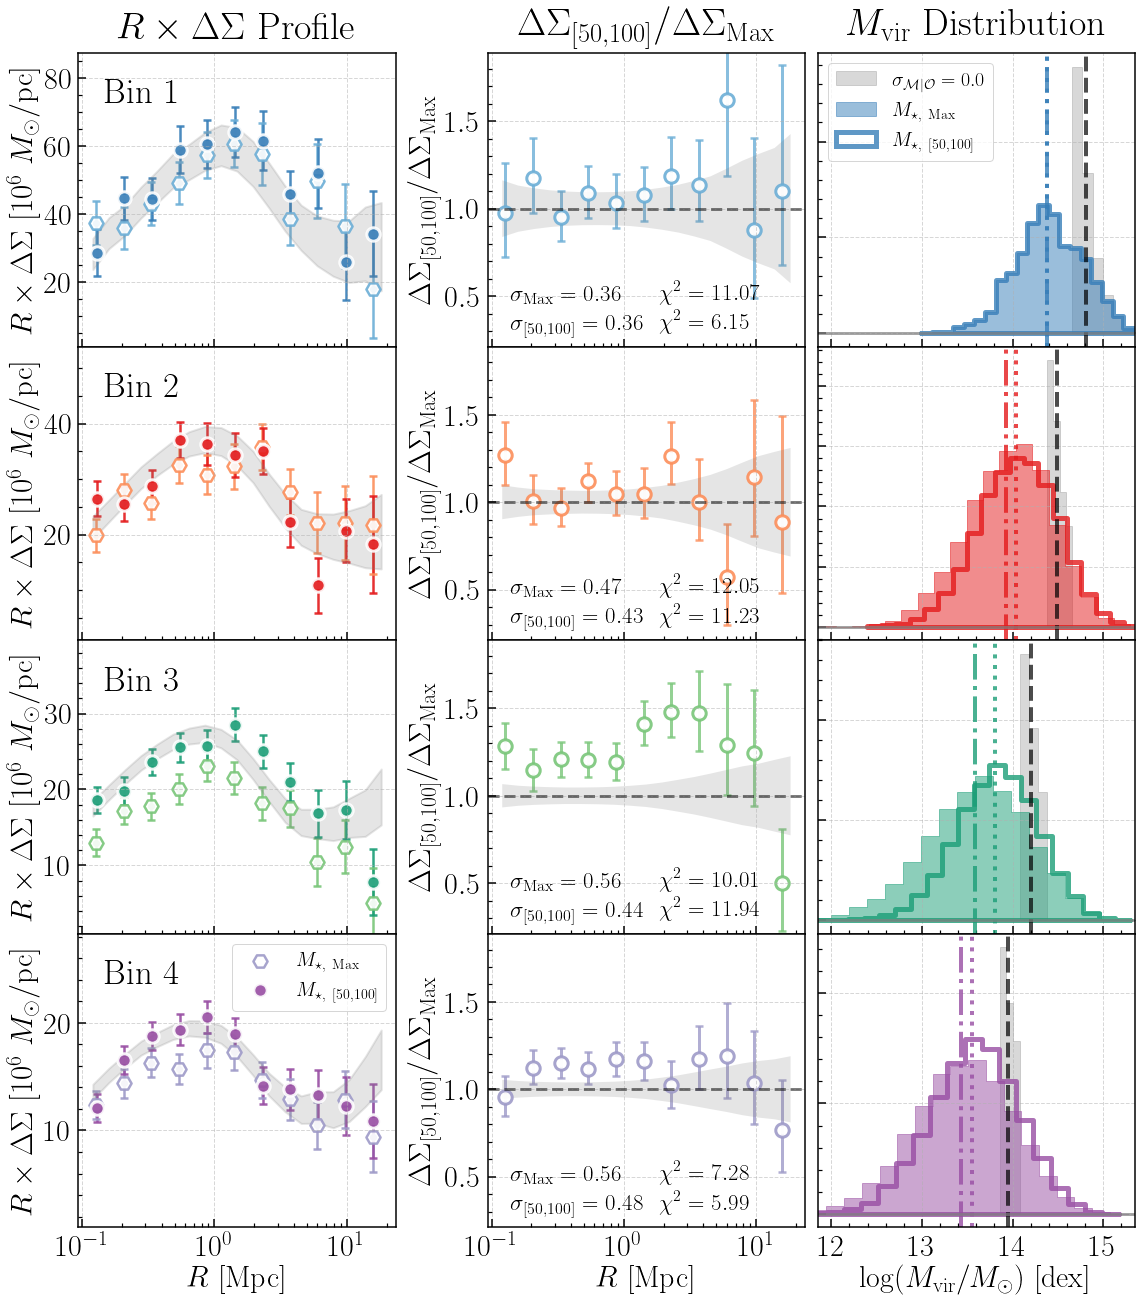

In [45]:
dsig_ref = mmax_dsig
label_ref = r'$M_{\star,\ \rm Max}$'
sub_ref = r'{\rm Max}'

dsig_cmp = m50_100_dsig
label_cmp = r'$M_{\star,\ [50, 100]}$'
sub_cmp = r'{[50, 100]}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='bt', compare_to_model=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp,
    marker_ref='H', marker_cmp='o', msize_ref=200, msize_cmp=180,
    ratio_range=(0.21, 1.89), show_stats=True)

#### 100 kpc stellar mass v.s. [50, 150] kpc mass

In [46]:
m100_dsig = topn_massive['logm_100']
mmax_dsig = topn_massive['logm_max']

m50_100_dsig = topn_massive['logm_50_100']
m50_150_dsig = topn_massive['logm_50_150']

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 1.091+/-0.208
Mean Mvir: 14.326 v.s. 14.414
Difference of Mvir in Bin 1: -0.087
Mean ratio in Bin 2: 1.266+/-0.171
Mean Mvir: 13.863 v.s. 14.060
Difference of Mvir in Bin 2: -0.198
Mean ratio in Bin 3: 1.248+/-0.122
Mean Mvir: 13.585 v.s. 13.786
Difference of Mvir in Bin 3: -0.201
Mean ratio in Bin 4: 1.239+/-0.115
Mean Mvir: 13.325 v.s. 13.590
Difference of Mvir in Bin 4: -0.265


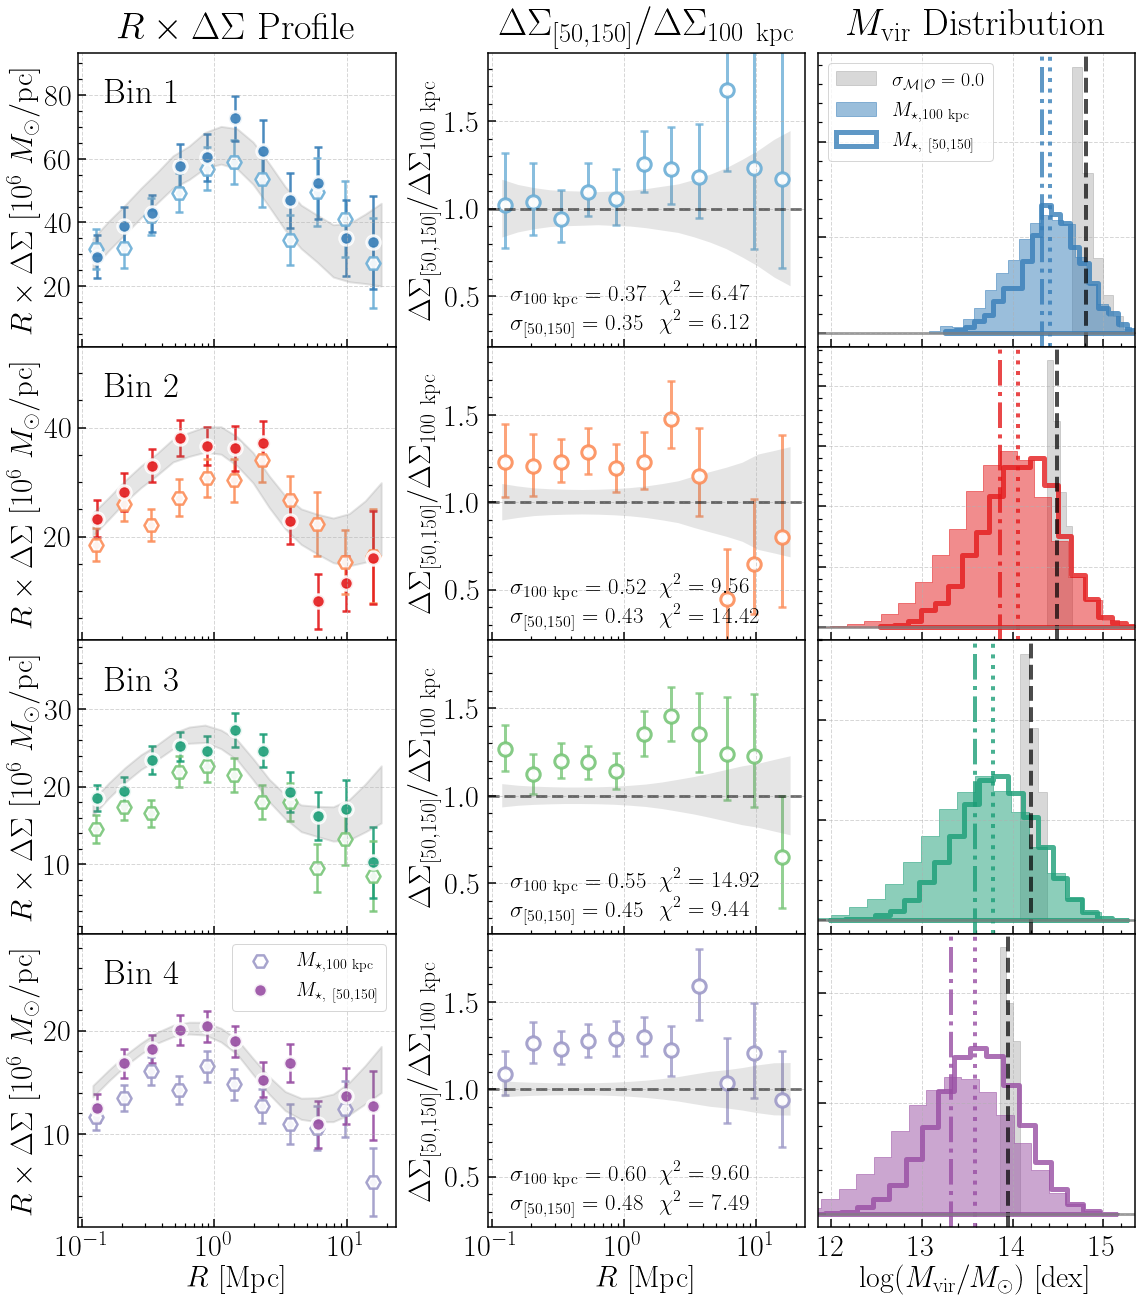

In [47]:
dsig_ref = m100_dsig
label_ref = r'$M_{\star,100\ \rm kpc}$'
sub_ref = r'{100\ \rm kpc}'

dsig_cmp = m50_150_dsig
label_cmp = r'$M_{\star,\ [50, 150]}$'
sub_cmp = r'{[50, 150]}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='bt', compare_to_model=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp,
    marker_ref='H', marker_cmp='o', msize_ref=200, msize_cmp=180,
    ratio_range=(0.21, 1.89), show_stats=True)

 #### Impact of satellites

In [48]:
m100_dsig = topn_massive['logm_100_cen1']
m50_100_dsig = topn_massive['logm_50_100_cen1']

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 1.076+/-0.197
Mean Mvir: 14.385 v.s. 14.385
Difference of Mvir in Bin 1: 0.000


/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 2: 1.189+/-0.169
Mean Mvir: 13.834 v.s. 13.985
Difference of Mvir in Bin 2: -0.151
Mean ratio in Bin 3: 1.223+/-0.130
Mean Mvir: 13.541 v.s. 13.762
Difference of Mvir in Bin 3: -0.221
Mean ratio in Bin 4: 1.132+/-0.116
Mean Mvir: 13.325 v.s. 13.487
Difference of Mvir in Bin 4: -0.162


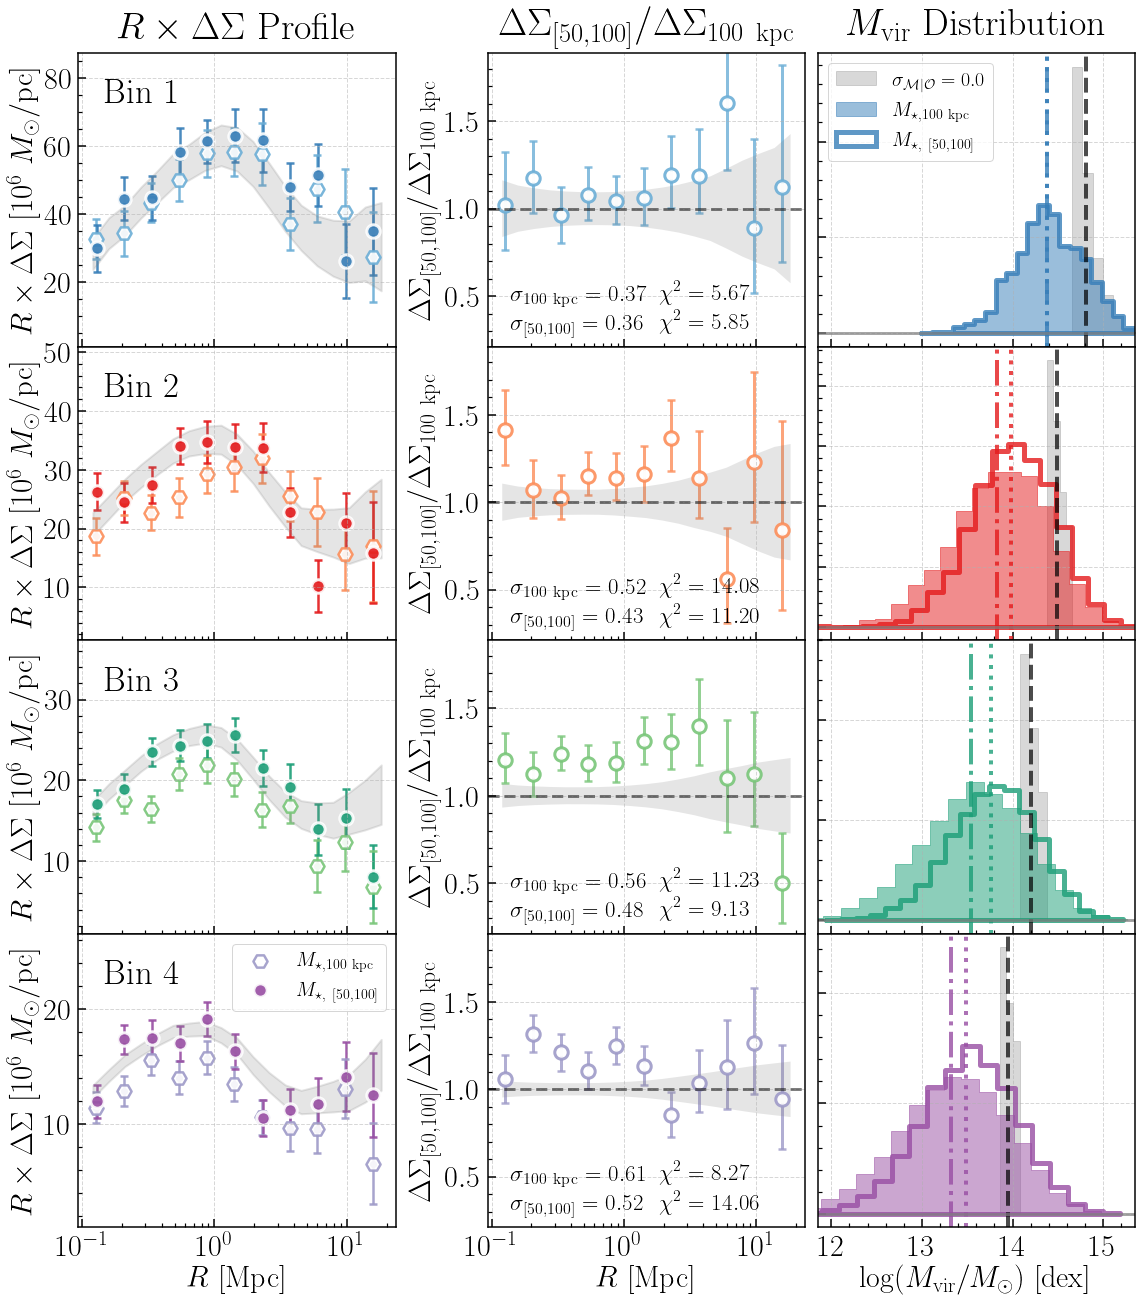

In [49]:
dsig_ref = m100_dsig
label_ref = r'$M_{\star,100\ \rm kpc}$'
sub_ref = r'{100\ \rm kpc}'

dsig_cmp = m50_100_dsig
label_cmp = r'$M_{\star,\ [50, 100]}$'
sub_cmp = r'{[50, 100]}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='bt', compare_to_model=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp,
    marker_ref='H', marker_cmp='o', msize_ref=200, msize_cmp=180,
    ratio_range=(0.21, 1.89), show_stats=True)

### Compared to ASAP model

In [8]:
m100_dsig = topn_massive['logm_100']
asap_dsig = topn_massive['logmh_vir_plane']

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 1.051+/-0.197
Mean Mvir: 14.326 v.s. 14.326
Difference of Mvir in Bin 1: 0.000


/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 2: 1.181+/-0.162
Mean Mvir: 13.863 v.s. 14.009
Difference of Mvir in Bin 2: -0.146
Mean ratio in Bin 3: 1.193+/-0.122
Mean Mvir: 13.585 v.s. 13.726
Difference of Mvir in Bin 3: -0.141
Mean ratio in Bin 4: 1.094+/-0.116
Mean Mvir: 13.325 v.s. 13.405
Difference of Mvir in Bin 4: -0.080


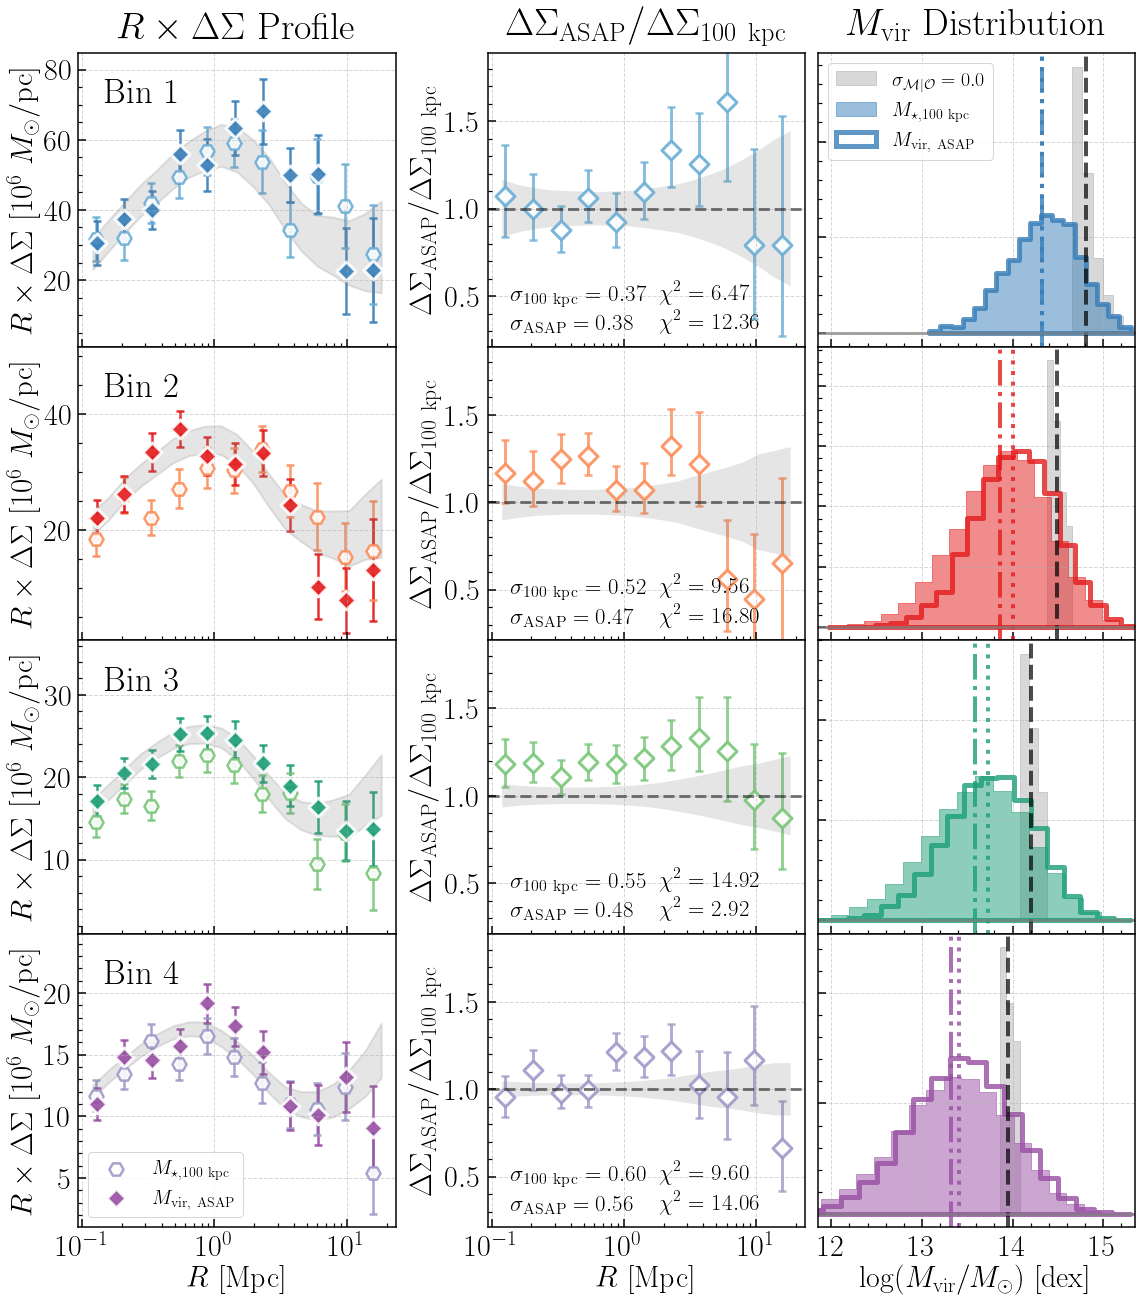

In [9]:
dsig_ref = m100_dsig
label_ref = r'$M_{\star,100\ \rm kpc}$'
sub_ref = r'{100\ \rm kpc}'

dsig_cmp = asap_dsig
label_cmp = r'$M_{\rm vir,\ ASAP}$'
sub_cmp = r'{\rm ASAP}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='bt', compare_to_model=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp,
    marker_ref='H', marker_cmp='D', msize_ref=200, msize_cmp=180,
    ratio_range=(0.21, 1.89), show_stats=True)

In [12]:
mout_dsig = topn_massive['logm_50_100']
asap_dsig = topn_massive['logmh_vir_plane']

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 1.027+/-0.191
Mean Mvir: 14.385 v.s. 14.326
Difference of Mvir in Bin 1: 0.058


/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 2: 0.992+/-0.128
Mean Mvir: 14.035 v.s. 14.009
Difference of Mvir in Bin 2: 0.027
Mean ratio in Bin 3: 0.948+/-0.097
Mean Mvir: 13.808 v.s. 13.726
Difference of Mvir in Bin 3: 0.082
Mean ratio in Bin 4: 0.891+/-0.094
Mean Mvir: 13.553 v.s. 13.405
Difference of Mvir in Bin 4: 0.148


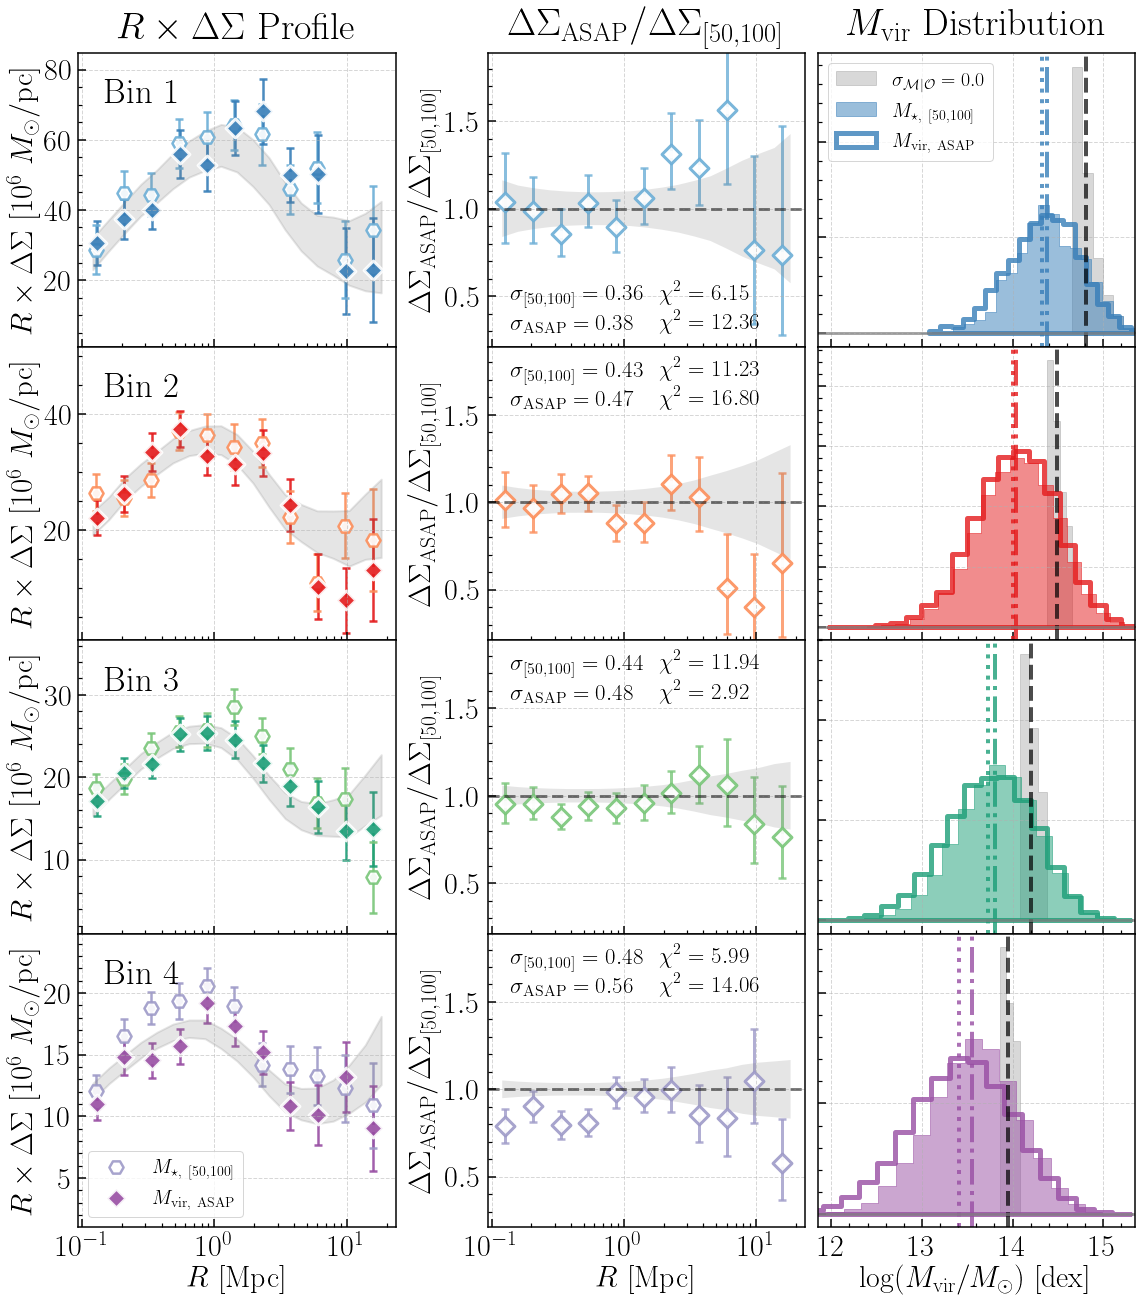

In [13]:
dsig_ref = mout_dsig
label_ref = r'$M_{\star,\ [50, 100]}$'
sub_ref = r'{[50, 100]}'

dsig_cmp = asap_dsig
label_cmp = r'$M_{\rm vir,\ ASAP}$'
sub_cmp = r'{\rm ASAP}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='bt', compare_to_model=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp,
    marker_ref='H', marker_cmp='D', msize_ref=200, msize_cmp=180,
    ratio_range=(0.21, 1.89), show_stats=True)